## SVM Kernals 


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [112]:
x = np.linspace(0, 10, 100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])
x,y

(array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
          0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
          0.80808081,   0.90909091,   1.01010101,   1.11111111,
          1.21212121,   1.31313131,   1.41414141,   1.51515152,
          1.61616162,   1.71717172,   1.81818182,   1.91919192,
          2.02020202,   2.12121212,   2.22222222,   2.32323232,
          2.42424242,   2.52525253,   2.62626263,   2.72727273,
          2.82828283,   2.92929293,   3.03030303,   3.13131313,
          3.23232323,   3.33333333,   3.43434343,   3.53535354,
          3.63636364,   3.73737374,   3.83838384,   3.93939394,
          4.04040404,   4.14141414,   4.24242424,   4.34343434,
          4.44444444,   4.54545455,   4.64646465,   4.74747475,
          4.84848485,   4.94949495,   5.05050505,   5.15151515,
          5.25252525,   5.35353535,   5.45454545,   5.55555556,
          5.65656566,   5.75757576,   5.85858586,   5.95959596,
          6.06060606,   6.16161616,   6.

In [113]:
x1 = np.linspace(0, 10, 100)
y1=np.sqrt(15**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

In [114]:
y1

array([ 15.        ,  14.99965989,  14.99863953,  14.99693878,
        14.99455739,  14.99149506,  14.98775135,  14.98332577,
        14.9782177 ,  14.97242645,  14.96595122,  14.95879113,
        14.95094519,  14.94241233,  14.93319136,  14.923281  ,
        14.91267989,  14.90138656,  14.88939941,  14.87671679,
        14.8633369 ,  14.84925786,  14.83447769,  14.81899428,
        14.80280543,  14.78590882,  14.76830202,  14.74998249,
        14.73094757,  14.71119448,  14.69072032,  14.66952208,
        14.64759661,  14.62494065,  14.60155078,  14.57742348,
        14.55255509,  14.52694178,  14.50057963,  14.47346453,
        14.44559224,  14.41695838,  14.38755839,  14.35738758,
        14.32644106,  14.29471381,  14.26220061,  14.22889608,
        14.19479463,  14.15989053,  14.12417781,  14.08765032,
        14.05030172,  14.01212544,  13.97311468,  13.93326245,
        13.8925615 ,  13.85100435,  13.80858326,  13.76529026,
        13.72111709,  13.67605522,  13.63009583,  13.58

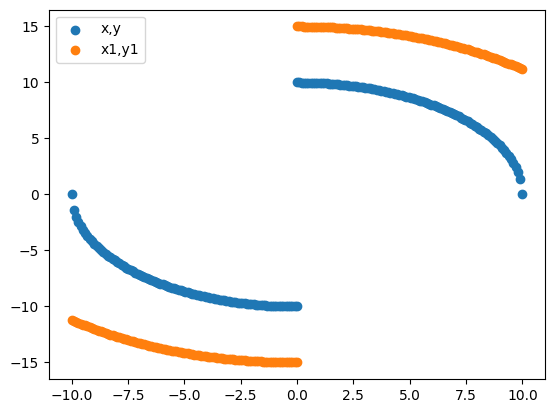

In [115]:
plt.scatter(x,y ,label='x,y')
plt.scatter(x1,y1,label='x1,y1')
plt.legend()

In [116]:
df1 = pd.DataFrame(np.vstack([x,y]).T,columns=['x1','x2'])
df2 = pd.DataFrame(np.vstack([x1,y1]).T,columns=['x1','x2'])
df1['Y'] = 0
df2['Y'] = 1
df = pd.concat([df1,df2],ignore_index=True)
df.sample(5)

,x1,x2,Y
396,-9.696970,-11.444159,1
240,4.040404,14.445592,1
393,-9.393939,-11.694182,1
82,8.282828,5.603102,0
168,-6.868687,-7.267815,0


In [117]:
df.isnull().sum()

x1    0
x2    0
Y     0
dtype: int64

In [118]:
X = df[['x1','x2']]
y = df['Y']

In [119]:
X.shape,y.shape

((400, 2), (400,))

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
## Polynomial Kernel
df["x1**"]=df["x1"]**2
df["x2**"]=df["x2"]**2
df["x1*x2"]=df["x1"]*df["x2"]
df.head()

,x1,x2,Y,x1**,x2**,x1*x2
0,0.00000,10.000000,0,0.000000,100.000000,0.000000
1,0.10101,9.999490,0,0.010203,99.989797,1.010049
2,0.20202,9.997959,0,0.040812,99.959188,2.019790
3,0.30303,9.995408,0,0.091827,99.908173,3.028911
4,0.40404,9.991834,0,0.163249,99.836751,4.037105


In [123]:
df.tail()

,x1,x2,Y,x1**,x2**,x1*x2
395,-9.59596,-11.528988,1,92.082441,132.917559,110.631701
396,-9.69697,-11.444159,1,94.031221,130.968779,110.973665
397,-9.79798,-11.357799,1,96.000408,128.999592,111.283482
398,-9.89899,-11.269871,1,97.990001,127.009999,111.560342
399,-10.00000,-11.180340,1,100.000000,125.000000,111.803399


In [124]:
df.isnull().sum()

x1       0
x2       0
Y        0
x1**     0
x2**     0
x1*x2    0
dtype: int64

In [125]:
X = df[['x1','x2','x1**','x2**','x1*x2']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1', y='x2', z='x1*x2',color='Y')
fig.show()

In [127]:
fig = px.scatter_3d(df, x='x1**', y='x2**', z='x1*x2',color='Y')
fig.show()

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 5), (80, 5), (320,), (80,))

In [129]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

100.0


In [130]:
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Fit the SVC model with 5 features
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and print accuracy
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred) * 100)

# Apply PCA to reduce to 2D or 3D for visualization
pca = PCA(n_components=3)  # Change to 2 if you want a 2D plot
X_pca = pca.fit_transform(X_train)

# Create a meshgrid for plotting decision surface
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 30),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 30))

# Get decision function values for the grid (for a 3D decision surface)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(),np.c_[xx.ravel()**2,yy.ravel()**2,xx.ravel()*yy.ravel()]])
Z = Z.reshape(xx.shape)

# Visualize the decision boundary using Plotly
fig = px.scatter_3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2], color=y_train)

# Add decision surface
fig.add_surface(z=Z, x=xx, y=yy, colorscale='Blues', opacity=0.3)
fig.show()


100.0


/workspaces/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [131]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

100.0


In [132]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

18.75
